In [1]:
import joblib
import pandas as pd
import numpy as np 
from pathlib import Path
from matplotlib import pyplot as plt
import joblib 
import numpy as np 

from uncertainties import ufloat, unumpy

import mplhep as hep
hep.style.use("ATLAS")

In [2]:
best_model = joblib.load('/global/cfs/projectdirs/atlas/wys/HEP_Repo/QG_Calibration/NewWorkflow/LightGBM/4vars/full_dataset/lightgbm_gbdt.pkl')


In [3]:
print(best_model)

LGBMClassifier(bagging_fraction=0.9367626980204136, bagging_freq=2,
               feature_fraction=0.9078062096018138,
               lambda_l1=1.2253716283973005e-07,
               lambda_l2=1.8406905294877443e-06, min_child_samples=96,
               num_leaves=230)


In [111]:
pkl_path = '/global/cfs/projectdirs/atlas/wys/HEP_Repo/QG_Calibration/NewWorkflow/note_plots'
pkl_path = Path(pkl_path)
nominal_path = pkl_path / 'nominal' / 'plots' / 'ADE' / 'Extraction_Results'

reweighting_vars = ['jet_nTracks', 'GBDT_newScore']
nominal_keys = [reweighting_var + '_quark_reweighting_weights' for reweighting_var in reweighting_vars]
WPs = [0.5, 0.6, 0.7, 0.8]
label_ptrange = [500, 600, 800, 1000, 1200, 1500]


In [2]:
#sampleA = joblib.load('/global/cfs/projectdirs/atlas/wys/QG_Calibration/note_plots_new/nominal/pythiaA_pred.pkl')
sampleD = joblib.load('/global/cfs/projectdirs/atlas/wys/QG_Calibration/note_plots_new/nominal/pythiaD_pred.pkl')
#sampleE1 = joblib.load('/global/cfs/projectdirs/atlas/wys/HEP_Repo/QG_Calibration/NewWorkflow/trained_lightGBM_new_hrzhao/nominal/pythiaE_part1_pred.pkl')
#sampleE2 = joblib.load('/global/cfs/projectdirs/atlas/wys/HEP_Repo/QG_Calibration/NewWorkflow/trained_lightGBM_new_hrzhao/nominal/pythiaE_part2_pred.pkl')

sample=sampleD
#sample.update(sampleD)
#sample.update(sampleE1)
#sample.update(sampleE2)

In [4]:
sample.head()

,run,event,jet_pt,jet_eta,jet_nTracks,jet_trackWidth,jet_trackC1,jet_trackBDT,jet_PartonTruthLabelID,jet_cleaning,event_weight,is_forward,is_leading,pt_idx,target,GBDT_newScore,jet_nTracks_quark_reweighting_weights,jet_nTracks_gluon_reweighting_weights,GBDT_newScore_quark_reweighting_weights,GBDT_newScore_gluon_reweighting_weights
0,364703.0,50893998.0,1060.033569,-0.851053,15.0,0.021721,0.170793,-0.139815,-1.0,2.0,32.706951,1.0,1.0,3,-,-1.567963,32.706951,32.706951,32.706951,32.706951
1,364703.0,50893998.0,852.974487,-0.001528,23.0,0.084879,0.229928,0.022073,-1.0,2.0,32.706951,0.0,0.0,2,-,-0.488597,35.960412,32.015286,33.478837,30.868768
2,364703.0,51240730.0,643.553223,0.085626,9.0,0.011934,0.146485,-0.465420,-1.0,2.0,40.057640,0.0,1.0,1,-,-3.173646,34.967315,34.122539,35.050894,35.910259
3,364703.0,51240730.0,626.548767,-2.004576,4.0,0.020028,0.134805,-0.490492,-1.0,2.0,40.057640,1.0,0.0,1,-,-3.185737,40.057640,40.057640,40.057640,40.057640
0,364703.0,64798842.0,686.511963,-0.413676,27.0,0.138940,0.251069,0.053051,-1.0,2.0,32.545246,1.0,1.0,1,-,-0.308242,32.545246,32.545246,32.545246,32.545246


# Confusion matrix 

In [3]:
import seaborn as sns
#from WeightedCorr import WeightedCorr
#Using Pearson Correlation
training_vars = ['jet_pt','jet_eta','jet_nTracks', 'jet_trackWidth','jet_trackC1','GBDT_newScore']
vars=['$p_{T}$','$\eta$','$n_{trk}$','$w^{trk}$','$C_{1}$','BDT']



plt.figure(figsize=(6,6))
cor = sample[training_vars].corr()
#weight_corr = WeightedCorr(df=sample[training_vars + ['event_weight']], wcol='event_weight')(method='pearson')
#cor_round=np.round(cor,decimals=2)
print(cor)
s=sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#s=sns.heatmap(weight_corr, annot=True, cmap=plt.cm.Reds)
s.set(xticklabels=vars,yticklabels=vars)
plt.savefig("../corr_w.pdf")
plt.show()

ModuleNotFoundError: No module named 'WeightedCorr'

In [16]:
pkl = '/global/cfs/projectdirs/atlas/wys/gammajetntupleprod/run/Local_10000/data-minitrees/mc16_13TeV.364705.Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ5WithSW.deriv.DAOD_JETM1.e7142_e5984_s3126_r9364_r9315_p4870.root'
pkl_path = Path(pkl)

#import uproot
#sample_root = uproot.open(pkl_path)['nominal']

In [14]:
from root_pandas import read_root

Welcome to JupyROOT 6.22/08


In [24]:
#sample_root.keys()
sample = read_root(pkl,'nominal',flatten=['jet_nTracks', 'jet_trackWidth','jet_trackC1','jet_cleaning'])
sample.head()

/global/cfs/projectdirs/atlas/wys/miniconda3/envs/ml/lib/python3.9/site-packages/root_numpy/_tree.py:234: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  arr = _librootnumpy.root2array_fromfile(
/global/cfs/projectdirs/atlas/wys/miniconda3/envs/ml/lib/python3.9/site-packages/root_numpy/_tree.py:234: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  arr = _librootnumpy.root2array_fromfile(
/global/cfs/projectdirs/atlas/wys/miniconda3/envs/ml/lib/python3.9/site-packages/root_numpy/

,run,event,last,year,mconly_weight,syst_weight,pu_weight,jet_fire,weight_pileup_up,weight_pileup_down,jet_nTracks,jet_trackWidth,jet_trackC1,jet_cleaning,__array_index
0,364705,34758458,17,2016,2.692492e-08,1.754055e-08,1.754055e-08,True,1.0,1.0,12.0,0.021106,0.172682,2,0
1,364705,34758458,17,2016,2.692492e-08,1.754055e-08,1.754055e-08,True,1.0,1.0,19.0,0.038895,0.199785,2,1
2,364705,34760082,17,2016,1.238429e-08,1.249249e-08,1.249249e-08,True,1.0,1.0,12.0,0.015742,0.176987,2,0
3,364705,34760082,17,2016,1.238429e-08,1.249249e-08,1.249249e-08,True,1.0,1.0,18.0,0.034008,0.168088,2,1
4,364705,34761735,17,2016,7.733862e-09,7.620025e-09,7.620025e-09,True,1.0,1.0,10.0,0.023214,0.097633,2,0


In [1]:
import seaborn as sns
#Using Pearson Correlation
training_vars = ['jet_nTracks', 'jet_trackWidth','jet_trackC1','jet_cleaning']
#vars=['Ntrk','Wtrk','C1','BDT']

plt.figure(figsize=(6,6))
cor = sample[training_vars].corr()
print(cor)
s=sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#s.set(xticklabels=vars,yticklabels=vars)
plt.savefig("./jet_cleaning_corr.pdf")
plt.show()

NameError: name 'plt' is not defined

In [38]:
from WeightedCorr import WeightedCorr

In [40]:
weight_corr = WeightedCorr(df=sample[training_vars + ['event_weight']], wcol='event_weight')(method='pearson')

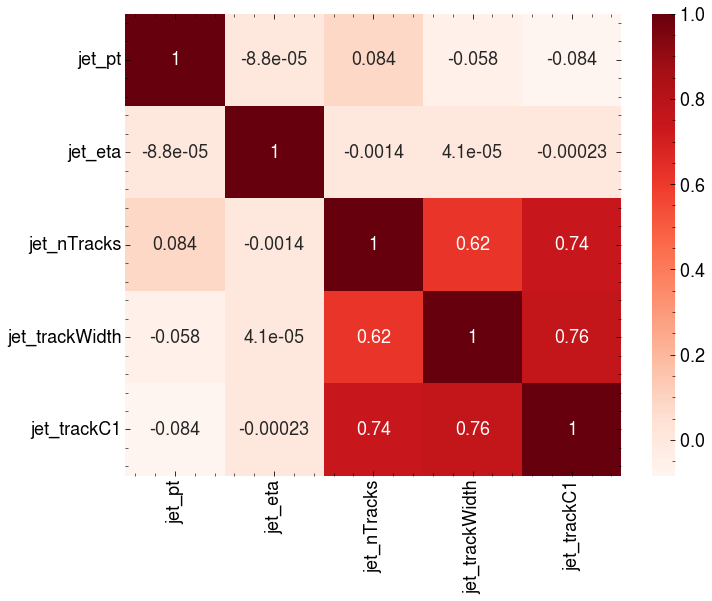

In [42]:
plt.figure()
sns.heatmap(weight_corr, annot=True, cmap=plt.cm.Reds)
plt.savefig("./plots/weighted_corr")
plt.show()